In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

C:\Users\lyumu\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Word2Vec

In [125]:
pubmedDF['normalized_sents']

1      [[although, effects, periphyton, water, qualit...
2      [[according, literature, data, main, factors, ...
3      [[mercury, concentrations, environment, tend, ...
4      [[occurrence, partitioning, distribution, seve...
5      [[present, experimental, analysis, two, oils, ...
6      [[sulfaquinoxaline, sqx, antimicrobial, sulfon...
7      [[sorption, classic, emerging, organic, contam...
8      [[formulation, factors, relevant, developing, ...
10     [[mesenchymal, stem, cells, adscs, useful, cel...
11     [[bone, morphogenetic, protein, potent, induce...
13     [[objective, number, programs, representing, v...
14     [[neuregulin, adipokine, synthesized, many, ti...
15     [[objectives, assess, safety, efficacy, electr...
16     [[objectives, breast, cancer, tnbc, aggressive...
17     [[objectives, aim, study, evaluate, results, a...
18     [[objectives, downregulation, diras, family, r...
19     [[objectives, investigate, possible, associati...
20     [[although, hysteroscopy

## Visualize

In [30]:
pubmed = pandas.read_pickle("/Users/lyumu/Google Drive/pubmed_preprocessing/combined_data.pkl")

In [32]:
snowball = nltk.stem.snowball.SnowballStemmer('english')

pubmed['tokenized_sents'] = pubmed['abstract'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
pubmed['normalized_sents'] = pubmed['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = snowball) 
                                                                            for s in x])
pubmed[:5]

,abstract,affiliation,author,country,delete,issn_linking,journal,keywords,medline_ta,mesh_terms,...,pubdate,title,tokenized_abstract,tokenized_title,normalized_abstract,normalized_title,psyc_check,psyc_filter,tokenized_sents,normalized_sents
0,Both gamma-glutamyltransferase (gammaGT) and p...,NaN,M Cucuianu; D Zdrenghea; M Pop; A Opincaru,Netherlands,False,0009-8981,Clinica chimica acta; international journal of...,NaN,Clin Chim Acta,D000328:Adult; D000368:Aged; D000437:Alcoholis...,...,1976,Increased serum gamma-glutamyltransferase in h...,"[Both, gamma-glutamyltransferase, (, gammaGT, ...","[Increased, serum, gamma-glutamyltransferase, ...","[gammagt, pseudocholinesteras, pce, found, inc...","[increas, serum, hypertriglyceridemia, compari...",[behavior],True,"[[Both, gamma-glutamyltransferase, (, gammaGT,...","[[gammagt, pseudocholinesteras, pce, found, in..."
1,Hearing impairment and related cochlear histop...,NaN,WC Stebbins; JE Hawkins; LG Johnson; DB Moody,United States,False,0196-0709,American journal of otolaryngology,NaN,Am J Otolaryngol,D000818:Animals; D001299:Audiometry; D001309:A...,...,1979,Hearing thresholds with outer and inner hair c...,"[Hearing, impairment, and, related, cochlear, ...","[Hearing, thresholds, with, outer, and, inner,...","[hear, impair, relat, cochlear, histopatholog,...","[hear, threshold, outer, inner, hair, cell, loss]",[behavior],True,"[[Hearing, impairment, and, related, cochlear,...","[[hear, impair, relat, cochlear, histopatholog..."
2,RBP behavior was studied in different kidney d...,NaN,L Scarpioni; PP Dall'aglio; PG Poisetti; C Buzio,Netherlands,False,0009-8981,Clinica chimica acta; international journal of...,NaN,Clin Chim Acta,D003404:Creatinine; D006801:Humans; D007674:Ki...,...,1976,Retinol binding protein in serum and in urine ...,"[RBP, behavior, was, studied, in, different, k...","[Retinol, binding, protein, in, serum, and, in...","[rbp, behavior, studi, differ, kidney, diseas,...","[retinol, bind, protein, serum, urin, glomerul...",[behavior],True,"[[RBP, behavior, was, studied, in, different, ...","[[rbp, behavior, studi, differ, kidney, diseas..."
3,The determination of Zn in fingernails directl...,NaN,A Sohler; P Wolcott; CC Pfeiffer,Netherlands,False,0009-8981,Clinica chimica acta; international journal of...,NaN,Clin Chim Acta,D005069:Evaluation Studies as Topic; D006197:H...,...,1976,Determination of zinc in fingernails by non-fl...,"[The, determination, of, Zn, in, fingernails, ...","[Determination, of, zinc, in, fingernails, by,...","[determin, zn, fingernail, direct, use, graphi...","[determin, zinc, fingernail, atom, absorpt, sp...",[behavior],True,"[[The, determination, of, Zn, in, fingernails,...","[[determin, zn, fingernail, direct, use, graph..."
4,PURPOSE\r\nThis study was developed to test th...,"Department of Psychiatry, Cornell University M...",B Landis; E Landis,United States,False,0196-0709,American journal of otolaryngology,NaN,Am J Otolaryngol,D000328:Adult; D000368:Aged; D001299:Audiometr...,...,1992,Is biofeedback effective for chronic tinnitus?...,"[PURPOSE, This, study, was, developed, to, tes...","[Is, biofeedback, effective, for, chronic, tin...","[purpos, studi, develop, test, hypothesi, inte...","[biofeedback, effect, chronic, tinnitus, inten...","[psycholog, psycholog]",True,"[[PURPOSE, This, study, was, developed, to, te...","[[purpos, studi, develop, test, hypothesi, int..."


In [39]:

pubmed['pubdate']= pubmed['pubdate'].astype(str)

In [40]:
num_int_date = len([idx for (idx, value) in enumerate(pubmed['pubdate']) 
                    if isinstance(value, int)])
num_str_date = len([idx for (idx, value) in enumerate(pubmed['pubdate']) 
                    if isinstance(value, str)])
num_int_date, num_str_date

(0, 111571)

In [3]:
#pubmed.to_pickle("wordembedding_data.pkl")
pubmed = pandas.read_pickle("wordembedding_data.pkl")

## 10to15

In [3]:
pubmed_10to15 = pubmed.query('pubdate >= "2010" and pubdate <= "2015"')

In [84]:
len(pubmed_10to15['abstract'])

4224

In [5]:
snow = snowball = nltk.stem.snowball.SnowballStemmer('english')
snow.stem('processing')

'process'

In [4]:
def stemmSents(s):
    return [[snow.stem(w) for w in sent] for sent in s]

In [15]:
pubmed_10to15['normalized_sents_Stem'] = pubmed_10to15['normalized_sents'].apply(stemmSents)

C:\Users\lyumu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
pubmed_10to15['normalized_sents_Stem']

274       [[object, investig, protocol, identifi, evalu,...
275       [[object, identifi, factor, associ, attempt, s...
276       [[object, obtain, assent, respect, dissent, wi...
277       [[object, apathi, common, behavior, problem, p...
278       [[object, describ, preval, stroke, depress, bs...
279       [[object, identifi, patient, group, alzheim, d...
280       [[object, analyz, differ, variabl, associ, sev...
281       [[object, stigma, associ, mental, ill, continu...
282       [[object, test, impact, novel, psychosoci, int...
283       [[background, stress, disord, ptsd, associ, ne...
284       [[object, neuropsychiatr, symptom, common, pat...
285       [[background, main, aim, studi, examin, sympto...
286       [[context, depress, negat, affect, health, wel...
287       [[object, author, use, object, assess, physic,...
288       [[object, examin, whether, associ, area, socio...
289       [[object, older, adult, especi, unlik, seek, m...
290       [[object, alzheim, diseas, ad,

In [22]:
pubmedW2V = gensim.models.word2vec.Word2Vec(pubmed_10to15['normalized_sents_Stem'].sum())

full matrix

In [23]:
pubmedW2V.wv.syn0

array([[ 1.0646172e-01,  5.9307647e-01,  8.6498785e-01, ...,
         7.3793775e-01,  6.8886459e-01,  3.4694013e-01],
       [-1.0509341e+00,  1.2738374e+00, -2.3222288e-01, ...,
         7.2111726e-01,  5.4251915e-01,  1.5394305e-01],
       [ 1.1755914e-01,  9.0622497e-01,  5.9248757e-02, ...,
        -3.6493516e-01, -4.2996213e-01, -4.6116391e-01],
       ...,
       [ 2.1263609e-02,  2.3039518e-02,  2.4832208e-02, ...,
        -6.2885869e-04,  2.5039945e-02,  8.8238865e-02],
       [ 1.1198716e-02,  1.6821517e-02, -6.2178791e-04, ...,
         1.5725901e-03,  1.1449387e-02,  6.3528873e-02],
       [ 3.6277184e-03,  1.7222026e-02,  2.2335764e-02, ...,
        -4.4256914e-04,  3.5237834e-02,  1.1008169e-01]], dtype=float32)

In [24]:
# define dictionary
with open("psyc_unique_dict_156_from_1000.txt") as f:
    psyc_dict = [x.strip('\n') for x in f.readlines()]
targetWords = sorted(psyc_dict) # sort alphabetically
targetWords # len 172

['abus',
 'accompani',
 'addict',
 'adher',
 'adolesc',
 'adopt',
 'aggress',
 'alcohol',
 'american',
 'amplitud',
 'antagonist',
 'anxieti',
 'attempt',
 'attend',
 'attitud',
 'autism',
 'awar',
 'balanc',
 'basic',
 'beyond',
 'bias',
 'brief',
 'call',
 'captur',
 'categori',
 'child',
 'childhood',
 'choic',
 'circuit',
 'code',
 'comorbid',
 'constant',
 'consum',
 'consumpt',
 'coordin',
 'cope',
 'cortex',
 'cortic',
 'cue',
 'deficit',
 'development',
 'diet',
 'difficulti',
 'dimens',
 'disabl',
 'discrimin',
 'disrupt',
 'distress',
 'dopamin',
 'drink',
 'drive',
 'eat',
 'econom',
 'electr',
 'elicit',
 'emot',
 'empir',
 'engag',
 'equat',
 'excit',
 'execut',
 'exercis',
 'face',
 'fear',
 'feed',
 'flexibl',
 'fundament',
 'hand',
 'healthcar',
 'hippocamp',
 'hippocampus',
 'hiv',
 'home',
 'hormon',
 'ill',
 'illustr',
 'immedi',
 'inhibitori',
 'input',
 'instrument',
 'intak',
 'item',
 'lifestyl',
 'magnitud',
 'mainten',
 'manipul',
 'matern',
 'memori',
 'mental

In [6]:
#numWords = 500
#targetWords = pubmedW2V.wv.index2word[:numWords]

In [50]:
#with open("target_10to15.txt", "w", encoding = "utf-8") as f:
    #for item in targetWords:
        #print(item, file=f) 

In [53]:
# define dictionary
#with open("target_10to15.txt") as f:
    #psyc_dict = [x.strip('\n') for x in f.readlines()]
#targetWords = sorted(psyc_dict) # sort alphabetically
#targetWords 

['ability',
 'abuse',
 'action',
 'active',
 'activities',
 'activity',
 'adolescents',
 'african',
 'age',
 'alcohol',
 'alzheimer',
 'american',
 'anxiety',
 'asthma',
 'attention',
 'attitudes',
 'behavior',
 'behavioral',
 'behaviors',
 'biological',
 'birth',
 'brain',
 'cancer',
 'cell',
 'cells',
 'child',
 'childhood',
 'children',
 'chronic',
 'clinical',
 'cognitive',
 'communication',
 'community',
 'conclusion',
 'context',
 'cortex',
 'dementia',
 'demographic',
 'depression',
 'depressive',
 'development',
 'diabetes',
 'diagnosis',
 'diet',
 'disease',
 'disorder',
 'disorders',
 'distress',
 'drinking',
 'drug',
 'drugs',
 'eating',
 'education',
 'emotional',
 'environment',
 'environmental',
 'events',
 'exercise',
 'experience',
 'exposure',
 'family',
 'female',
 'functional',
 'functioning',
 'functions',
 'gender',
 'gene',
 'genes',
 'genetic',
 'health',
 'healthy',
 'hiv',
 'hospital',
 'impairment',
 'infection',
 'injury',
 'intervention',
 'interventions',
 

In [20]:
numWords = len(targetWords)

156

We can then extract their vectors and create our own smaller matrix that preserved the distances from the original:

In [25]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(pubmedW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.64744794, -0.06906317,  0.86573184, ...,  1.0573908 ,
         1.0106661 ,  1.2494678 ],
       [ 0.0568838 ,  0.03707865,  0.3629496 , ...,  0.03351593,
         0.16691664,  0.6637919 ],
       [-0.31713519,  0.00990015,  0.38645574, ...,  0.09036229,
         0.34165445,  0.59990585],
       ...,
       [-0.06136755,  0.12832835,  0.44817832, ...,  0.3940244 ,
         0.1050835 ,  0.534759  ],
       [ 0.00135586,  0.0968361 ,  0.2939081 , ..., -0.02924088,
         0.06771682,  0.6131345 ],
       [-0.06106895,  0.33370516,  0.2810652 , ...,  0.96340007,
         0.29723826,  0.22818433]], dtype=float32)

Then we can use PCA to reduce the dimesions (e.g., to 50), and [T-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words:

In [26]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

We now can plot the points

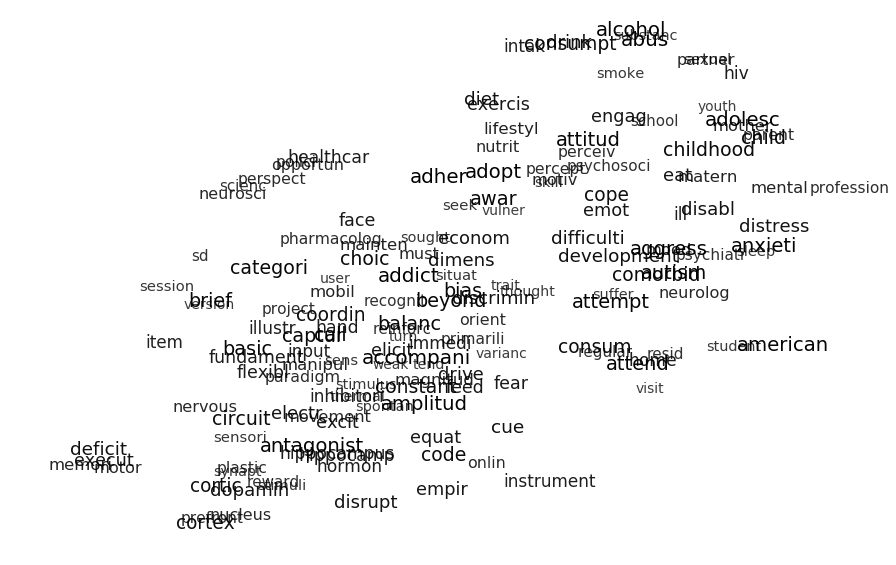

In [27]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

## for 80-89

In [28]:
pubmed_80to89 = pubmed.query('pubdate >= "1980" and pubdate <= "1989"')

In [85]:
len(pubmed_80to89['abstract'])

2689

In [30]:
pubmed_80to89['normalized_sents_Stem'] = pubmed_80to89['normalized_sents'].apply(stemmSents)

C:\Users\lyumu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
pubmedW2V = gensim.models.word2vec.Word2Vec(pubmed_80to89['normalized_sents_Stem'].sum())

full matrix

In [36]:
pubmedW2V.wv.syn0

array([[ 0.09469964,  0.30146068,  0.3765793 , ...,  0.0645151 ,
        -0.0036079 ,  0.3972364 ],
       [ 0.09435782,  0.34507987,  0.24662098, ..., -0.08250526,
         0.06739256,  0.5291047 ],
       [ 0.10754885,  0.3555864 ,  0.2698945 , ...,  0.01467183,
        -0.04362764,  0.35378718],
       ...,
       [ 0.02454397,  0.05011745,  0.01818565, ...,  0.01053817,
         0.00133942,  0.06516166],
       [ 0.01526632,  0.0349701 ,  0.01359344, ...,  0.00677913,
         0.00284357,  0.0548615 ],
       [ 0.01591902,  0.03477794,  0.01783917, ...,  0.00514919,
        -0.00282096,  0.04279669]], dtype=float32)

In [32]:
# define dictionary
with open("psyc_unique_dict_156_from_1000.txt") as f:
    psyc_dict = [x.strip('\n') for x in f.readlines()]
targetWords = sorted(psyc_dict) # sort alphabetically
targetWords # len 172

['abus',
 'accompani',
 'addict',
 'adher',
 'adolesc',
 'adopt',
 'aggress',
 'alcohol',
 'american',
 'amplitud',
 'antagonist',
 'anxieti',
 'attempt',
 'attend',
 'attitud',
 'autism',
 'awar',
 'balanc',
 'basic',
 'beyond',
 'bias',
 'brief',
 'call',
 'captur',
 'categori',
 'child',
 'childhood',
 'choic',
 'circuit',
 'code',
 'comorbid',
 'constant',
 'consum',
 'consumpt',
 'coordin',
 'cope',
 'cortex',
 'cortic',
 'cue',
 'deficit',
 'development',
 'diet',
 'difficulti',
 'dimens',
 'disabl',
 'discrimin',
 'disrupt',
 'distress',
 'dopamin',
 'drink',
 'drive',
 'eat',
 'econom',
 'electr',
 'elicit',
 'emot',
 'empir',
 'engag',
 'equat',
 'excit',
 'execut',
 'exercis',
 'face',
 'fear',
 'feed',
 'flexibl',
 'fundament',
 'hand',
 'healthcar',
 'hippocamp',
 'hippocampus',
 'hiv',
 'home',
 'hormon',
 'ill',
 'illustr',
 'immedi',
 'inhibitori',
 'input',
 'instrument',
 'intak',
 'item',
 'lifestyl',
 'magnitud',
 'mainten',
 'manipul',
 'matern',
 'memori',
 'mental

In [62]:
#numWords = 500
#targetWords = pubmedW2V.wv.index2word[:numWords]

In [66]:
#with open("target_80to89.txt", "w", encoding = "utf-8") as f:
    #for item in targetWords:
        #print(item, file=f) 

In [69]:
# define dictionary
#with open("target_80to89.txt") as f:
    #psyc_dict = [x.strip('\n') for x in f.readlines()]
#targetWords = sorted(psyc_dict) # sort alphabetically

In [33]:
numWords = len(targetWords)

156

In [42]:
wordsSubMatrix = []
targetWordsExist = targetWords.copy()
for word in targetWords:
    try:
        wordsSubMatrix.append(pubmedW2V[word])
    except:
        targetWordsExist.remove(word)
        pass
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.08977442,  0.19188902,  0.09593547, ...,  0.03648904,
         0.01164567,  0.27070832],
       [ 0.14236367,  0.35459584,  0.17749035, ...,  0.028261  ,
         0.04497307,  0.5499158 ],
       [ 0.02651913,  0.06087586,  0.02120328, ...,  0.01065148,
        -0.00363447,  0.07965712],
       ...,
       [ 0.0386485 ,  0.10149387,  0.04939377, ...,  0.0097888 ,
         0.00965227,  0.13608608],
       [ 0.12942444,  0.30359942,  0.13577338, ...,  0.04178764,
         0.0124377 ,  0.4197616 ],
       [ 0.03161513,  0.07830384,  0.03346707, ...,  0.01413779,
         0.00920245,  0.10366485]], dtype=float32)

In [44]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

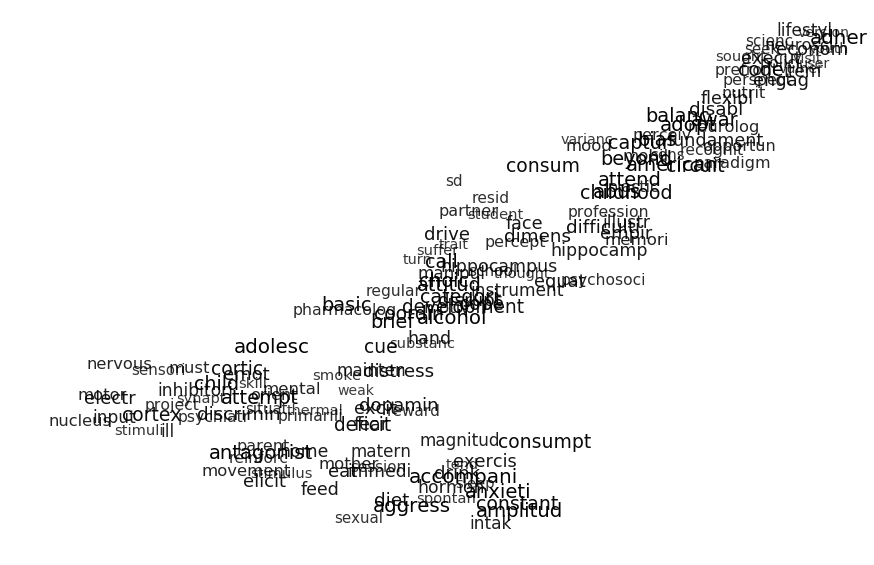

In [45]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWordsExist):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

## for 90-99

In [68]:
pubmed_90to99 = pubmed.query('pubdate >= "1990" and pubdate <= "1999"')

In [86]:
len(pubmed_90to99['abstract'])

4071

In [69]:
pubmed_90to99['normalized_sents_Stem'] = pubmed_90to99['normalized_sents'].apply(stemmSents)

C:\Users\lyumu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
pubmedW2V = gensim.models.word2vec.Word2Vec(pubmed_90to99['normalized_sents_Stem'].sum())

full matrix

In [71]:
pubmedW2V.wv.syn0

array([[-1.6436224e-01,  4.8836806e-01,  1.3114289e+00, ...,
         5.1270604e-01,  1.7846863e-01,  4.9731949e-01],
       [-1.6979232e-01,  2.3468919e-01,  4.7526607e-01, ...,
        -1.0228019e+00,  5.2430946e-01,  3.8906598e-01],
       [-5.9925741e-01,  1.5910903e-01,  6.2382126e-01, ...,
        -7.6076770e-01,  4.1571993e-01,  5.3053433e-01],
       ...,
       [ 1.9552853e-02,  5.6987130e-03,  3.5604533e-02, ...,
        -1.0335559e-02,  2.5684062e-02,  6.3277990e-02],
       [ 1.7616222e-02,  4.2530908e-03,  7.0429496e-02, ...,
        -9.9998750e-03,  2.5827645e-03,  8.4460355e-02],
       [ 4.2189173e-03,  9.9132850e-04,  2.4706144e-02, ...,
        -1.6079826e-02,  1.9172378e-02,  5.3506762e-02]], dtype=float32)

In [72]:
wordsSubMatrix = []
targetWordsExist = targetWords.copy()
for word in targetWords:
    try:
        wordsSubMatrix.append(pubmedW2V[word])
    except:
        targetWordsExist.remove(word)
        pass
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.21400039,  0.1360308 ,  0.7197672 , ...,  0.26700488,
         0.2552424 ,  0.69706565],
       [ 0.16106981,  0.12396133,  0.43714863, ..., -0.1941548 ,
         0.3790483 ,  0.498201  ],
       [ 0.07703494,  0.04807416,  0.20807748, ..., -0.00821986,
         0.04415095,  0.23275807],
       ...,
       [ 0.13722707,  0.09306013,  0.48947278, ...,  0.02703605,
         0.14885084,  0.4305585 ],
       [ 0.10041634,  0.07096867,  0.39627078, ..., -0.32493278,
         0.23365203,  0.53169286],
       [ 0.0807386 ,  0.03950128,  0.18102597, ...,  0.00514826,
         0.08516584,  0.22212228]], dtype=float32)

In [77]:
#numWords = 500
#targetWords = pubmedW2V.wv.index2word[:numWords]

In [78]:
#with open("target_90to99.txt", "w", encoding = "utf-8") as f:
    #for item in targetWords:
        #print(item, file=f) 

In [79]:
# define dictionary
#with open("target_90to99.txt") as f:
    #psyc_dict = [x.strip('\n') for x in f.readlines()]
#targetWords = sorted(psyc_dict) # sort alphabetically

In [73]:
numWords = len(targetWordsExist)

155

In [74]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

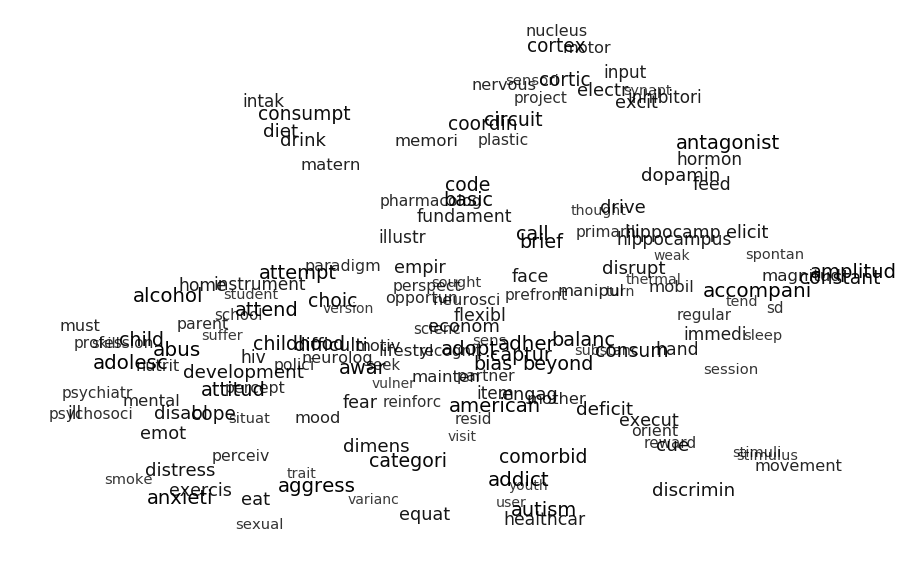

In [75]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWordsExist):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

## for 00-09

In [76]:
pubmed_00to09 = pubmed.query('pubdate >= "2000" and pubdate <= "2009"')

In [87]:
len(pubmed_00to09['abstract'])

2840

In [77]:
pubmed_00to09['normalized_sents_Stem'] = pubmed_00to09['normalized_sents'].apply(stemmSents)

C:\Users\lyumu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
pubmedW2V = gensim.models.word2vec.Word2Vec(pubmed_00to09['normalized_sents_Stem'].sum())

full matrix

In [79]:
pubmedW2V.wv.syn0

array([[-0.13931446, -0.1353225 ,  0.85515374, ...,  0.29252163,
         0.5444659 ,  1.2768823 ],
       [-0.35573378,  0.14203647,  0.31351376, ...,  0.18584038,
         0.3057052 ,  0.39795074],
       [-0.45970538,  0.06069597,  0.8383885 , ...,  0.07688998,
        -0.13193768,  0.3014528 ],
       ...,
       [ 0.01338072, -0.00643702,  0.03343993, ...,  0.00295099,
         0.02373772,  0.06405742],
       [ 0.01773207,  0.00951297,  0.08865264, ...,  0.02817226,
         0.10020445,  0.1755963 ],
       [ 0.00940003, -0.00439496,  0.02514484, ...,  0.00171706,
         0.02449961,  0.04611707]], dtype=float32)

In [87]:
#numWords = 500
#targetWords = pubmedW2V.wv.index2word[:numWords]

In [88]:
#with open("target_00to09.txt", "w", encoding = "utf-8") as f:
    #for item in targetWords:
        #print(item, file=f) 

In [91]:
# define dictionary
#with open("target_00to09.txt") as f:
    #psyc_dict = [x.strip('\n') for x in f.readlines()]
#targetWords = sorted(psyc_dict) # sort alphabetically

In [81]:
numWords = len(targetWords)

156

In [80]:
wordsSubMatrix = []
targetWordsExist = targetWords.copy()
for word in targetWords:
    try:
        wordsSubMatrix.append(pubmedW2V[word])
    except:
        targetWordsExist.remove(word)
        pass
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.02420611,  0.08500957,  0.49525997, ...,  0.20434758,
         0.47237223,  0.8243874 ],
       [ 0.10987839, -0.03245293,  0.3247206 , ...,  0.06270839,
         0.3382862 ,  0.72457933],
       [ 0.03654345,  0.002731  ,  0.23192053, ...,  0.05468559,
         0.21741527,  0.42741564],
       ...,
       [ 0.04673501, -0.0069133 ,  0.28859448, ...,  0.09578174,
         0.2749657 ,  0.51545006],
       [ 0.11699005, -0.01614385,  0.36340398, ...,  0.06985724,
         0.42101926,  0.8728728 ],
       [ 0.07847896,  0.15285563,  0.29260296, ...,  0.19633256,
         0.42702314,  0.651825  ]], dtype=float32)

In [82]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

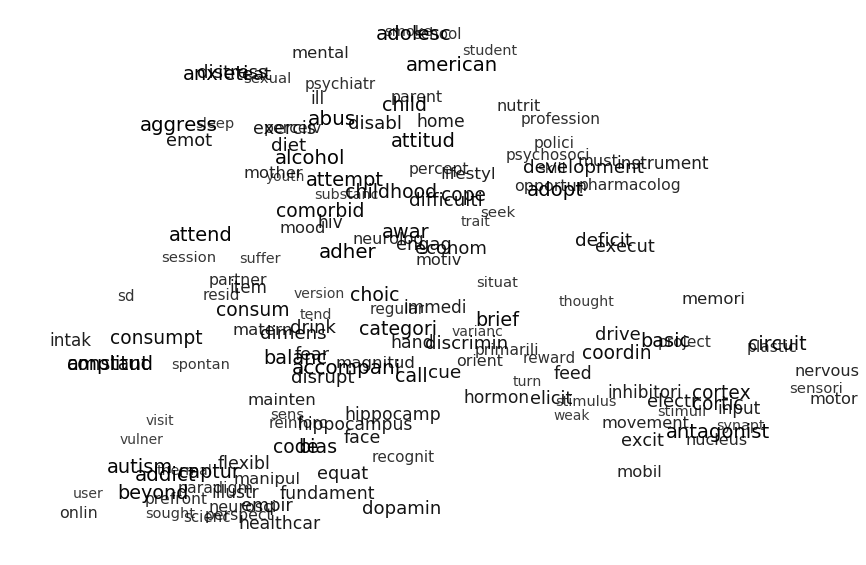

In [83]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWordsExist):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

In [88]:
pubmed_b80 = pubmed.query('pubdate < "1980"')

In [89]:
len(pubmed_b80['abstract'])

679

## all

In [68]:
#pubmed_90to99 = pubmed.query('pubdate >= "1990" and pubdate <= "1999"')

In [86]:
#len(pubmed_90to99['abstract'])

4071

In [6]:
pubmed['normalized_sents_Stem'] = pubmed['normalized_sents'].apply(stemmSents)

In [7]:
pubmedW2V = gensim.models.word2vec.Word2Vec(pubmed['normalized_sents_Stem'].sum())

full matrix

In [8]:
pubmedW2V.wv.syn0

array([[-8.3012259e-01,  9.8932761e-01,  2.6925850e+00, ...,
         6.5035433e-01,  7.6415461e-01,  1.3471223e+00],
       [ 2.3575506e+00,  1.9415417e+00,  5.7111418e-01, ...,
         1.6443330e+00, -9.6581519e-01,  7.8740937e-01],
       [-2.1255298e+00,  2.1112525e+00,  1.4437401e-01, ...,
         1.7405374e-01, -3.3377595e-02,  5.3247869e-01],
       ...,
       [-2.9090669e-03, -6.6408336e-02, -2.3835257e-02, ...,
         4.9825221e-02,  2.8756902e-02,  8.0163538e-02],
       [ 5.5557270e-02,  6.1905097e-02,  8.5245311e-02, ...,
        -2.0968199e-02, -5.5119377e-02, -4.1676186e-02],
       [ 1.6921317e-02,  5.3197937e-03,  8.9830882e-04, ...,
         5.6696660e-04, -3.9291546e-02, -6.4537125e-03]], dtype=float32)

In [10]:
# define dictionary
with open("psyc_unique_dict_156_from_1000.txt") as f:
    psyc_dict = [x.strip('\n') for x in f.readlines()]
targetWords = sorted(psyc_dict) # sort alphabetically
targetWords # len 172

['abus',
 'accompani',
 'addict',
 'adher',
 'adolesc',
 'adopt',
 'aggress',
 'alcohol',
 'american',
 'amplitud',
 'antagonist',
 'anxieti',
 'attempt',
 'attend',
 'attitud',
 'autism',
 'awar',
 'balanc',
 'basic',
 'beyond',
 'bias',
 'brief',
 'call',
 'captur',
 'categori',
 'child',
 'childhood',
 'choic',
 'circuit',
 'code',
 'comorbid',
 'constant',
 'consum',
 'consumpt',
 'coordin',
 'cope',
 'cortex',
 'cortic',
 'cue',
 'deficit',
 'development',
 'diet',
 'difficulti',
 'dimens',
 'disabl',
 'discrimin',
 'disrupt',
 'distress',
 'dopamin',
 'drink',
 'drive',
 'eat',
 'econom',
 'electr',
 'elicit',
 'emot',
 'empir',
 'engag',
 'equat',
 'excit',
 'execut',
 'exercis',
 'face',
 'fear',
 'feed',
 'flexibl',
 'fundament',
 'hand',
 'healthcar',
 'hippocamp',
 'hippocampus',
 'hiv',
 'home',
 'hormon',
 'ill',
 'illustr',
 'immedi',
 'inhibitori',
 'input',
 'instrument',
 'intak',
 'item',
 'lifestyl',
 'magnitud',
 'mainten',
 'manipul',
 'matern',
 'memori',
 'mental

In [19]:
wordsSubMatrix = []
targetWordsExist = targetWords.copy()
for word in targetWords:
    try:
        wordsSubMatrix.append(pubmedW2V[word])
    except:
        targetWordsExist.remove(word)
        pass
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.4287362 , -1.164359  ,  0.03317183, ...,  1.0153139 ,
         2.0546517 , -0.48151538],
       [ 1.2906246 ,  1.9962556 , -1.7388425 , ..., -0.46005037,
        -0.06939231,  0.09464785],
       [ 1.003266  ,  2.5669768 ,  0.1432024 , ...,  0.97109824,
         2.7699206 ,  0.09495889],
       ...,
       [-1.4221263 , -0.9950786 ,  0.57779384, ..., -0.5083537 ,
         2.8920777 ,  0.8534954 ],
       [-1.1345925 , -0.36728823,  0.9988258 , ...,  1.3565172 ,
         0.16652173, -0.5812895 ],
       [-0.22151229,  1.3169968 ,  4.88742   , ..., -1.9476444 ,
         0.13811067,  1.7189887 ]], dtype=float32)

In [77]:
#numWords = 500
#targetWords = pubmedW2V.wv.index2word[:numWords]

In [78]:
#with open("target_90to99.txt", "w", encoding = "utf-8") as f:
    #for item in targetWords:
        #print(item, file=f) 

In [79]:
# define dictionary
#with open("target_90to99.txt") as f:
    #psyc_dict = [x.strip('\n') for x in f.readlines()]
#targetWords = sorted(psyc_dict) # sort alphabetically

In [20]:
numWords = len(targetWordsExist)

847

In [21]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

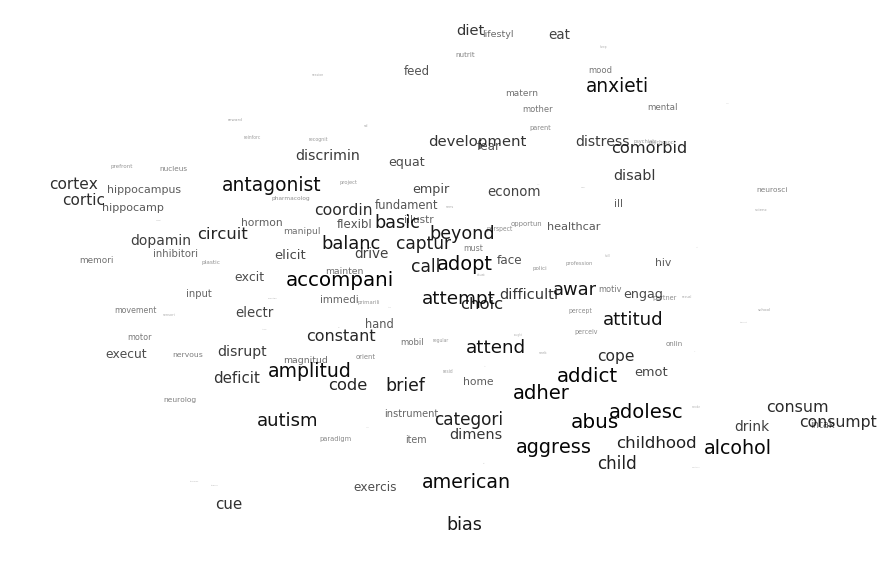

In [16]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWordsExist):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()

## All-847

In [19]:
wordsSubMatrix = []
targetWordsExist = targetWords.copy()
for word in targetWords:
    try:
        wordsSubMatrix.append(pubmedW2V[word])
    except:
        targetWordsExist.remove(word)
        pass
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 0.4287362 , -1.164359  ,  0.03317183, ...,  1.0153139 ,
         2.0546517 , -0.48151538],
       [ 1.2906246 ,  1.9962556 , -1.7388425 , ..., -0.46005037,
        -0.06939231,  0.09464785],
       [ 1.003266  ,  2.5669768 ,  0.1432024 , ...,  0.97109824,
         2.7699206 ,  0.09495889],
       ...,
       [-1.4221263 , -0.9950786 ,  0.57779384, ..., -0.5083537 ,
         2.8920777 ,  0.8534954 ],
       [-1.1345925 , -0.36728823,  0.9988258 , ...,  1.3565172 ,
         0.16652173, -0.5812895 ],
       [-0.22151229,  1.3169968 ,  4.88742   , ..., -1.9476444 ,
         0.13811067,  1.7189887 ]], dtype=float32)

In [20]:
numWords = len(targetWordsExist)

847

In [21]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2, early_exaggeration = 25).fit_transform(reducedPCA_data)

In [17]:
# define dictionary
with open("psyc_unique_dict_847_2k-1k.txt") as f:
    psyc_dict = [x.strip('\n') for x in f.readlines()]
targetWords = sorted(psyc_dict) # sort alphabetically
targetWords # len 172

['aberr',
 'abstin',
 'abstract',
 'abus',
 'academ',
 'acceler',
 'accompani',
 'accumben',
 'acoust',
 'acquisit',
 'actual',
 'addict',
 'adequ',
 'adhd',
 'adher',
 'adhes',
 'adolesc',
 'adopt',
 'adsorpt',
 'adulthood',
 'affin',
 'african',
 'aggreg',
 'aggress',
 'agonist',
 'aid',
 'air',
 'alcohol',
 'align',
 'allevi',
 'alloc',
 'alreadi',
 'alway',
 'alzheim',
 'amelior',
 'american',
 'amplitud',
 'amygdala',
 'analog',
 'anatom',
 'angl',
 'anion',
 'answer',
 'antagonist',
 'anterior',
 'anticip',
 'antidepress',
 'antioxid',
 'anxieti',
 'appar',
 'aqueous',
 'architectur',
 'argu',
 'aris',
 'arm',
 'arous',
 'array',
 'artifici',
 'assembl',
 'assist',
 'assum',
 'assumpt',
 'atom',
 'attempt',
 'attend',
 'attitud',
 'attract',
 'auditori',
 'augment',
 'autism',
 'automat',
 'autonom',
 'avers',
 'awar',
 'axi',
 'axon',
 'balanc',
 'band',
 'basal',
 'basic',
 'batteri',
 'behav',
 'belief',
 'believ',
 'belong',
 'beyond',
 'bias',
 'bilater',
 'biochem',
 'biome

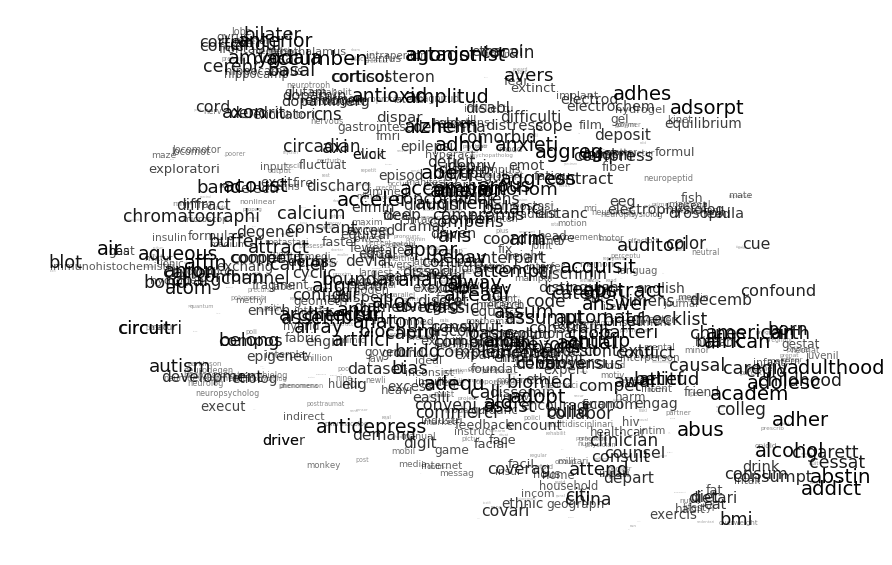

In [22]:
#for 847
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWordsExist):
    ax.annotate(word, 
                (tsneWords[:, 0][i],tsneWords[:, 1][i]), 
                size =  20 * (numWords - i) / numWords, 
                alpha = .8 * (numWords - i) / numWords + .2)
plt.xticks(())
plt.yticks(())
plt.show()